In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyts

     |████████████████████████████████| 2.5MB 4.5MB/s 


In [3]:
%matplotlib inline


# Gramian Angular Field


A Gramian Angular Field is an image obtained from a time series, representing
some temporal correlation between each time point. Two methods are
available: Gramian Angular Summation Field and Gramian Angular Difference
Field. This example illustrates the transformation on the first sample of
the *GunPoint* dataset. Both images are plotted side by side to illustrate
the differences.
It is implemented as :class:`pyts.image.GramianAngularField`.


(22, 1000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


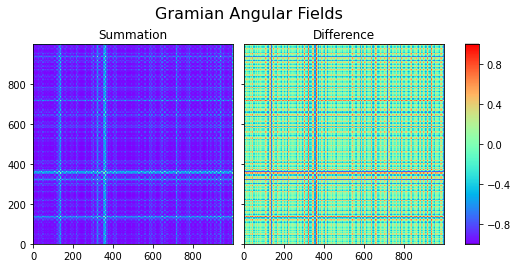

In [4]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
import numpy as np
import pandas as pd

# Parameters
#X, _, _, _ = load_gunpoint(return_X_y=True)

X = pd.read_csv("/content/drive/MyDrive/BTP_AMRITAMAM/Segmentation/A01/Training/A01T_1/1.csv")
X=X.T
#X=X[0]
print(X.shape)
# Transform the time series into Gramian Angular Fields
gasf = GramianAngularField(image_size=1000, method='summation')
X_gasf = gasf.fit_transform(X)
gadf = GramianAngularField(image_size=1000, method='difference')
X_gadf = gadf.fit_transform(X)

# Show the images for the first time series
fig = plt.figure(figsize=(8, 4))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Summation', 'Difference']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 12})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)
plt.suptitle('Gramian Angular Fields', y=0.98, fontsize=16)
plt.show()